<a href="https://colab.research.google.com/github/SunDubey/UCD/blob/main/Bank_Marketing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement :
Develop a classification model based on the target field "y". This represents whether a bank customer took up an offer from the bank's marketing offering or not.

Buisness Problem : Reduce loss to the company by accurately predicting the  potentail customers who would be willing to accept bank offer. So that success rate of marketing campaigns could increase resulting in increase of ROI for the bank.

 
Suppose i have a company and i want to increase my sales, bank in this case they want to decrease loss and increase profit. Now, to decrease loss they want to invest to make marketing offer to those who my model think would subscribe and actually also they subscribed.

Losses can be prevented in two cases :

1).By reducing the number of wrong predictions, cases where my model predicted customer would subscribe but actually he is not willing too. Now marketing offers would go to a wrong person resulting in poor customer targeting and increased losses.


2). By reducing number of cases where my model predicted customer would not subscribe but actually he is willing to subscribe.In this case we will not make a marketing offer to a customer who is willing to subscribe. This is very important point where customer is ready buisness is not reaching to him. Buisness is not only losing opportunity but also losing potential clients.

This is precision recall paradox, as our data is biased towards negative predictions false negative predictions could go up.
We can afford some false positives as conversion rate after the call will still be less. 
We need to be tight on false negatives, as customer want to deposit but bank did not make an offer as model predicted wrong.


# A. Attributes Description: <br>

# I. Bank client data:<br>
<a id="bank_client_data"></a>
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')<br>
6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
8 - **balance:** Balance of the individual.
# II. Related with the last contact of the current campaign:
<a id="last_contact"></a>
8 - **contact:** contact communication type (categorical: 'cellular','telephone') <br>
9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
# III. Other attributes:<br>
<a id="other_attributes"></a>
12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - **previous:** number of contacts performed before this campaign and for this client (numeric)<br>
15 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

Output variable (desired target):<br>
21 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
# let's install Feature-engine

!pip install feature-engine
!pip install pytorch_tabnet
!pip install chart-studio
!pip install catboost

import numpy as np

#Visualization libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#for some statistics
import math
import statistics as s
from scipy import stats
from scipy.stats import norm, skew 

#Feature engineering and metric
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold
import matplotlib.ticker as mtick


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, cv, Pool

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")



In [ ]:
data = pd.read_csv('bank.csv',sep=';')
data_copy = data.copy()
data.shape

(4521, 17)

In [ ]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


# Preprocessing

Count of Variables

In [ ]:
columns = list(data.columns)
Numerical_variables = []
Categorical_variables = []

#Numerical_variables = [column for column in columns if type(column)=='int64' or 'float64']
Numerical_variables = list(data.select_dtypes(include=[np.float64,np.int64]).columns)
Categorical_variables = list(data.select_dtypes(include=[object]).columns)

print("Number of Numerical columns : ", len(Numerical_variables))
print()
print("Numerical_variables : \n\n ", Numerical_variables)

print()

print("Number of Categorical columns : ", len(Categorical_variables))
print()
print("Categorical_variables : \n\n ", Categorical_variables)

Number of Numerical columns :  7

Numerical_variables : 

  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Number of Categorical columns :  10

Categorical_variables : 

  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


Lets check missing value count, luckily we dont have missing values. 

Text(0.5, 1.0, 'Percentage of missing values per feature')

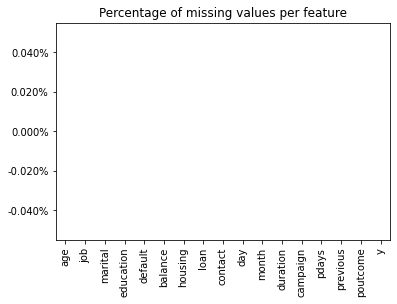

In [ ]:
new_data = data.copy()
new_data.isna().sum()

ax = (new_data.isnull().mean() * 100).plot(kind='bar', color ='orange')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of missing values per feature')



Nulls are not present in our data, categorical variables count are greater. 

In [ ]:
df_pivot = pd.DataFrame({'types': new_data.dtypes,
                         'nulls': new_data.isna().sum(),
                          '% nulls': new_data.isna().sum() / data.shape[0],
                          'size': new_data.shape[0],
                          'uniques': new_data.nunique()})
df_pivot

,types,nulls,% nulls,size,uniques
age,int64,0,0.0,4521,67
job,object,0,0.0,4521,12
marital,object,0,0.0,4521,3
education,object,0,0.0,4521,4
default,object,0,0.0,4521,2
balance,int64,0,0.0,4521,2353
housing,object,0,0.0,4521,2
loan,object,0,0.0,4521,2
contact,object,0,0.0,4521,3
day,int64,0,0.0,4521,31


Our Data has class imbalance problem, data from bank is mostly biased towards cases where client did not accept the offer. 

In [ ]:
(data['y'].value_counts()/len(data['y']))*100
data['y'] = data['y'].map({'yes':1,'no':0})
data_copy['y'] = data_copy['y'].map({'yes':1,'no':0})


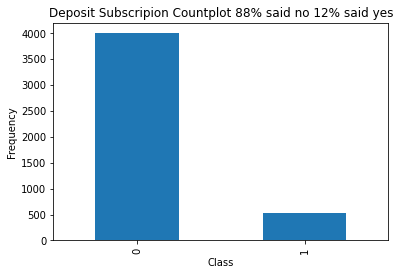

In [ ]:
count= pd.value_counts(data['y'],sort=True).sort_index()
count.plot(kind='bar')
plt.title("Deposit Subscripion Countplot 88% said no 12% said yes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


Lets do correlation analysis, as visible duration is the most helpful variable has 0.4 correlation coefficient. And duration has string negative correlation with balance and age and number of campaign calls for a certain campaign per client. Lets make use of this correlation analysis. High postive correlation and High negative correlation both are important to categorise deposit subscription.

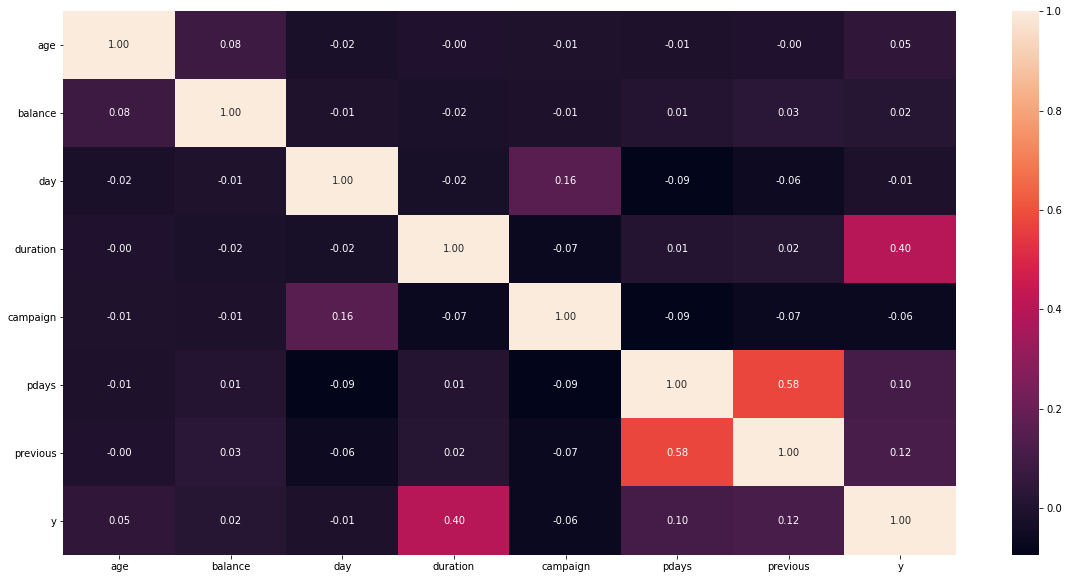

In [ ]:
# Checking Pearson's correlation with a heatmap
# correlation matrix 
plt.figure(figsize = (20,10))        
sb.heatmap(data.corr(),annot = True, fmt='.2f')
plt.yticks(rotation=0) 
plt.show()

## **EDA**

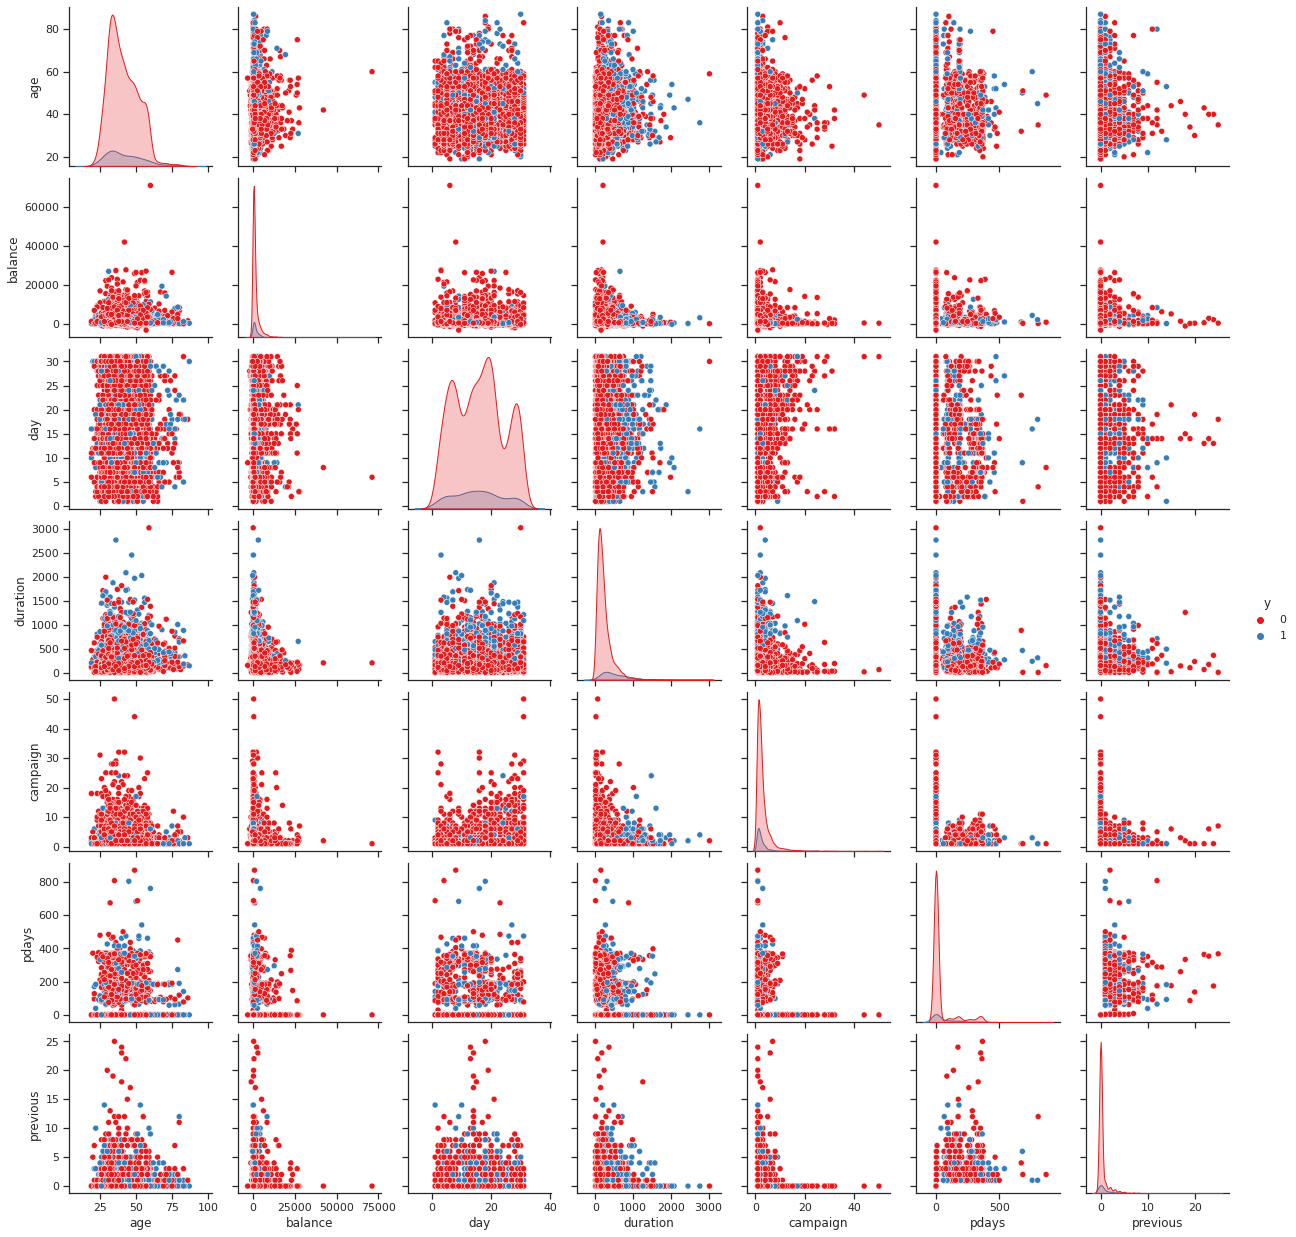

In [ ]:
sb.set(style="ticks")

sb.pairplot(data, hue="y", palette="Set1")
plt.show()

Patten of duration with balance 

**People with having less balance tend to talk more and are more likely to subscribe**

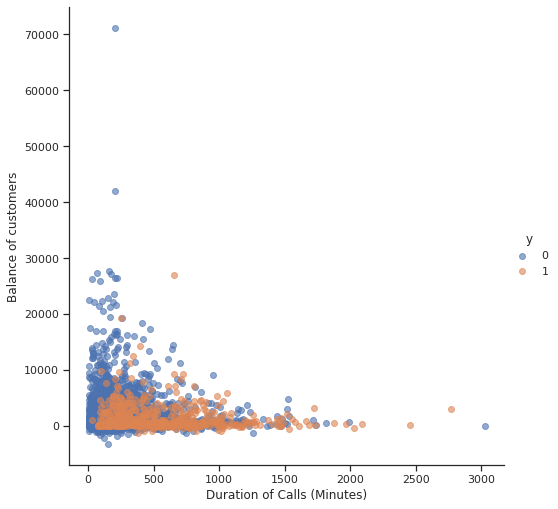

In [ ]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='balance',data = data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.ylabel('Balance of customers')
plt.xlabel('Duration of Calls (Minutes)')

plt.show()

Distribution of target variable with different categorical features

**Insights:**

**1).People who have been contacted on cellular phone subscribed more**

**2). People who have loan they have less probability of subscribing**

**3).Married people think about the future, they agree to subscribe.**

**4). Starting month of the year and ending month of the year, not many people  think of subscribing.**


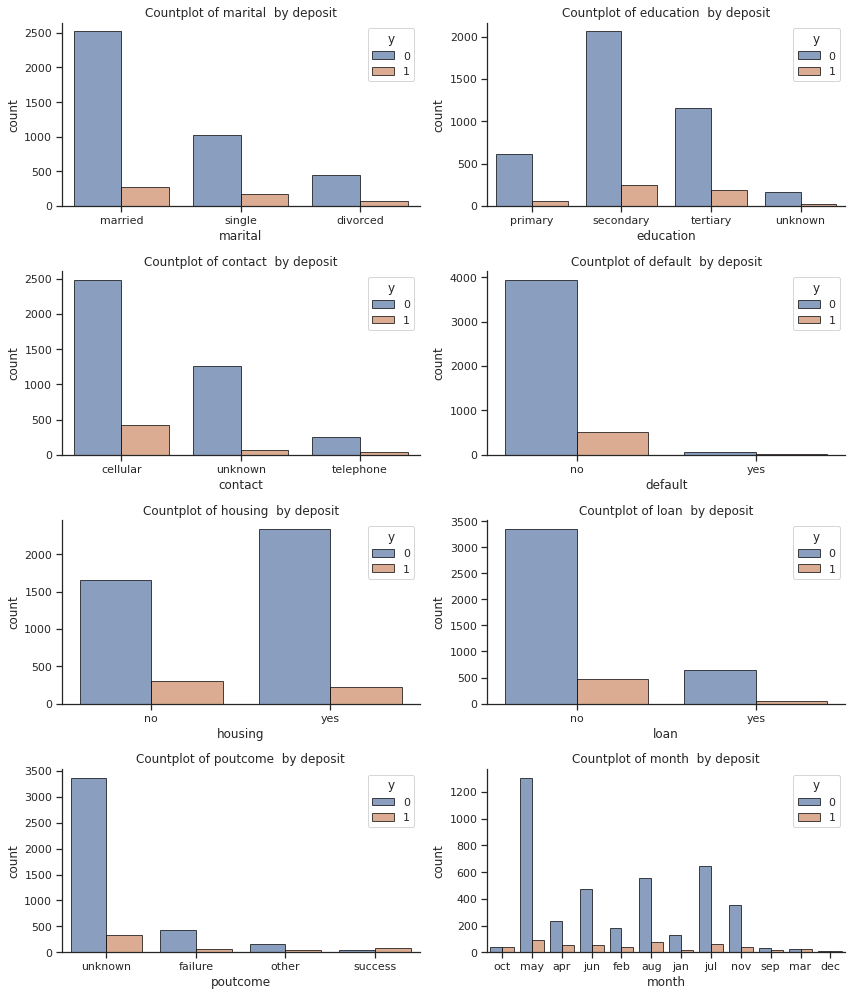

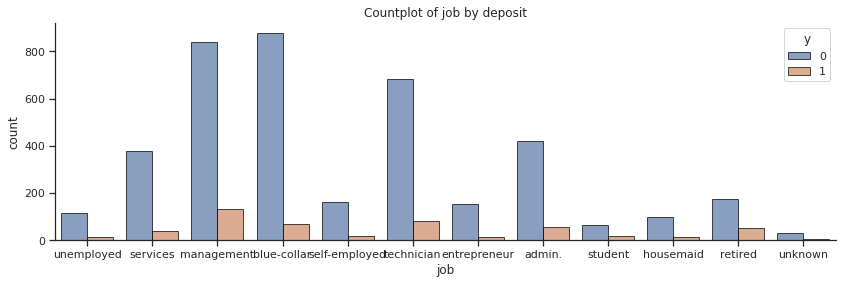

In [ ]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[12,14])
features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sb.countplot(x=f, hue='y', edgecolor="black", alpha=0.7, data=data)
    sb.despine()
    plt.title("Countplot of {}  by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[14,4])
sb.countplot(x='job', hue='y',edgecolor="black", alpha=0.7, data=data)
sb.despine()
plt.title("Countplot of job by deposit")
plt.show()



    For older than 60 age and younger than 30 age customers term deposit ratio dramatically increasing.
    Prabably all models will choose age as important attribute



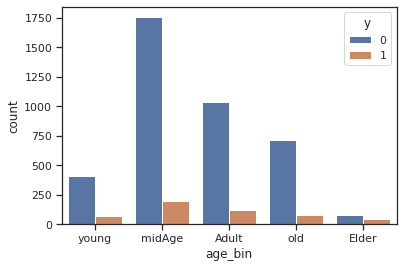

In [ ]:
data["age_bin"]=pd.cut(data.age,bins=[18,29,40,50,60,100],labels=['young','midAge','Adult',"old",'Elder'])
sb.countplot(x="age_bin",data=data,hue='y')
plt.show()

Lets analyse Campaign Calls:

These are the number of calls made to a potential clients within the same marketing campaign. Obviously, the more the calls we make to a potential client in a shorter period of time, the more irritated the potential client will be.

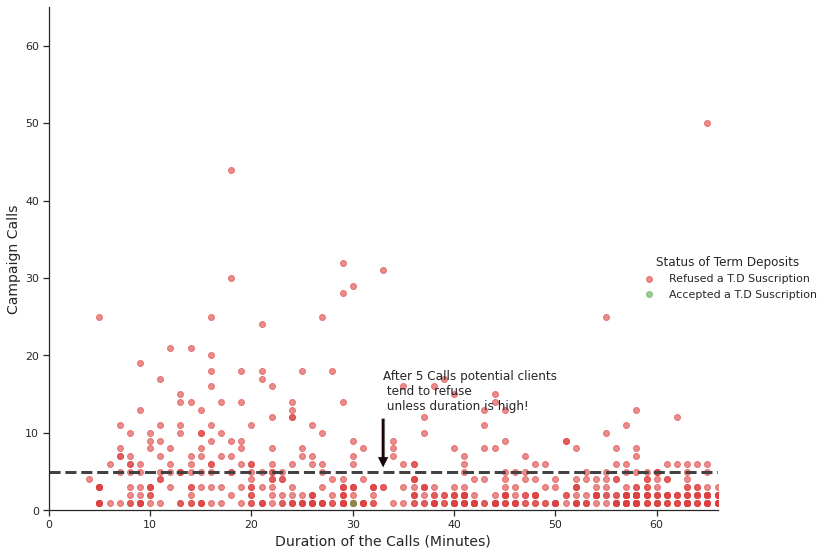

In [ ]:
colors = ['#DD4040', '#58AD4B', '#0096AA', '#9B00AA']


g = sb.lmplot(x='duration', y='campaign', data=data,
           fit_reg=False, # No regression line
           hue='y',
        palette = colors,
        scatter_kws={'alpha':0.6}
          ) 

g.fig.set_size_inches(12,8)
# title
new_title = 'Status of Term Deposits'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Refused a T.D Suscription', 'Accepted a T.D Suscription']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.axis([0,66,0,65])
plt.axhline(y=5, linewidth=3, color="#424242", linestyle='--')
plt.annotate('After 5 Calls potential clients \n tend to refuse \n unless duration is high!', xy=(33, 5), xytext=(33,13),
            arrowprops=dict(facecolor='#190707', shrink=0.05))
plt.xlabel('Duration of the Calls (Minutes)', fontsize=14)
plt.ylabel('Campaign Calls', fontsize=14)

plt.show()

Visualize the relationship between 'age' and 'balance

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


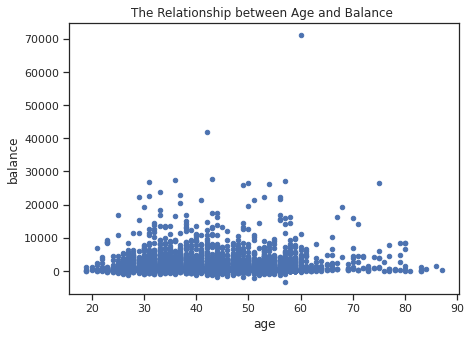

In [ ]:
scatter_age_balance = data.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

Which job sector people have highest or lowest balance based on that we can as per the data classify the amount of duration he can speak on an average

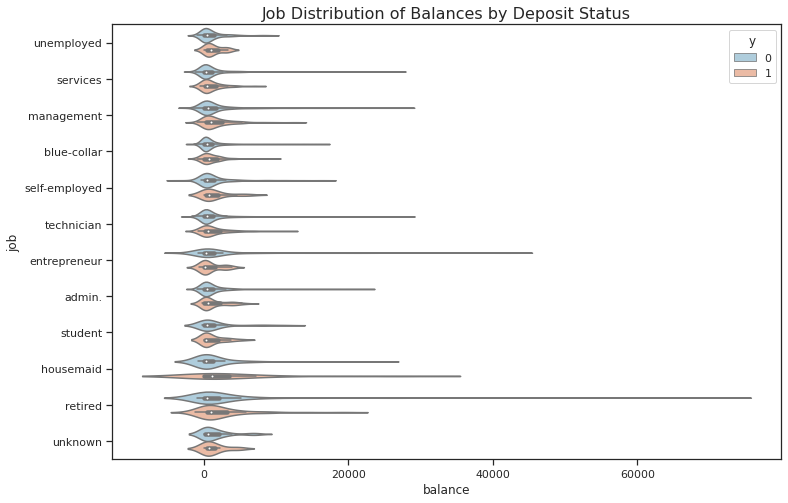

In [ ]:
fig = plt.figure(figsize=(12,8))

sb.violinplot(x="balance", y="job", hue="y", palette="RdBu_r",
            data=data);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

# Feature Engineering

Customer balance can be categorised into different income level groups

In [ ]:
# Create a Balance Category
data["balance_status"] = np.nan
lst = [data]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = data["balance"].loc[data["balance_status"] == "negative"].values.tolist()
low = data["balance"].loc[data["balance_status"] == "low"].values.tolist()
middle = data["balance"].loc[data["balance_status"] == "middle"].values.tolist()
high = data["balance"].loc[data["balance_status"] == "high"].values.tolist()



Month can be further grouped into quarters. (Q1,Q2,Q3,Q4)

In [ ]:
data.month = data_copy['month']
data.month = data.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
data.loc[data['month'] <= 3, 'Quarter'] = 'Q1'
data.loc[(data['month'] > 3) & (data['month'] <= 6), 'Quarter'] = 'Q2'
data.loc[(data['month'] > 6) & (data['month'] <= 9), 'Quarter'] = 'Q3'
data.loc[data['month'] >= 10, 'Quarter'] = 'Q4'

Days in a month can be grouped into different groups. They can be further binned into different weeks to get granualar level pattern of client subscription

In [ ]:
data["day_cat"] = np.nan
data.loc[data['day'] <5, 'day_cat'] = '1'
data.loc[(data['day'] >=5)&(data['day'] <=9), 'day_cat'] = '2'
data.loc[(data['day'] >=10)&(data['day'] <=13), 'day_cat'] = '3'
data.loc[(data['day'] >=14)&(data['day'] <=21), 'day_cat'] = '4'
data.loc[(data['day'] >=22), 'day_cat'] = '5'

data["day_bins"]=pd.cut(data.day,bins=4,labels=["w1","w2","w3","w4"])


Number of campaigns has negative correlation with client subscription, lets create categories to better understand the relationship.

People who have been called more number of times their probability of subscribing become less

In [ ]:
data["campaign_cat"] = np.nan
data.loc[data['campaign'] ==1, 'campaign_cat'] = 0
data.loc[(data['campaign'] >1), 'campaign_cat'] = 1

data["previous_cat"] = np.nan
data.loc[data['previous'] <=2, 'previous_cat'] = 0
data.loc[(data['previous'] >2), 'previous_cat'] = 1

**Creating new features, duration/age , duration/balance, duration/campaign. Duration is highly correlated with client subscription. Age, balance, and campaign are negatively correlated.**

** From the data its observed client who have less balance tend to talk more and they have a high probability of subscribing. People having more balance tend to talk less and less probability of subscribing**


In [ ]:
data['duration/age'] = data['duration']/data['age']
data['duration/balance'] = data['duration']/data['balance']
data['duration/campaign'] = data['duration']/data['campaign']


Here, the trend of client subscribing is dependent on duration. People talking more tend to subscribe and those people usually has less balance. 
Now , duration/balance ratio has infinity records, we already have less samples of client who took subscription out of what we have there are instances we have balance as zero. Now to to replace duration/balance values we can check the distribution of case where balance is not zero and client subscribed.

The cases where client subscribed , had less balance not zero but they were follwing a similar distribution where balance is less and duration is more. So we can replace the inf value of duration/value where client subscribed with mean of duration/value in cases where client subscribed but balance was not zero.

In cases on client not subsribing the observed trend was different, in those cases the the balance is more and duration of call is less hence it will have different balance and duration distribution. We can replace the inf value of duration/value where client did not subcribe with mean of cases where client did not subscribed but balance was not zero.




**Check the distribution of duration and balance having non zero and zero balance**

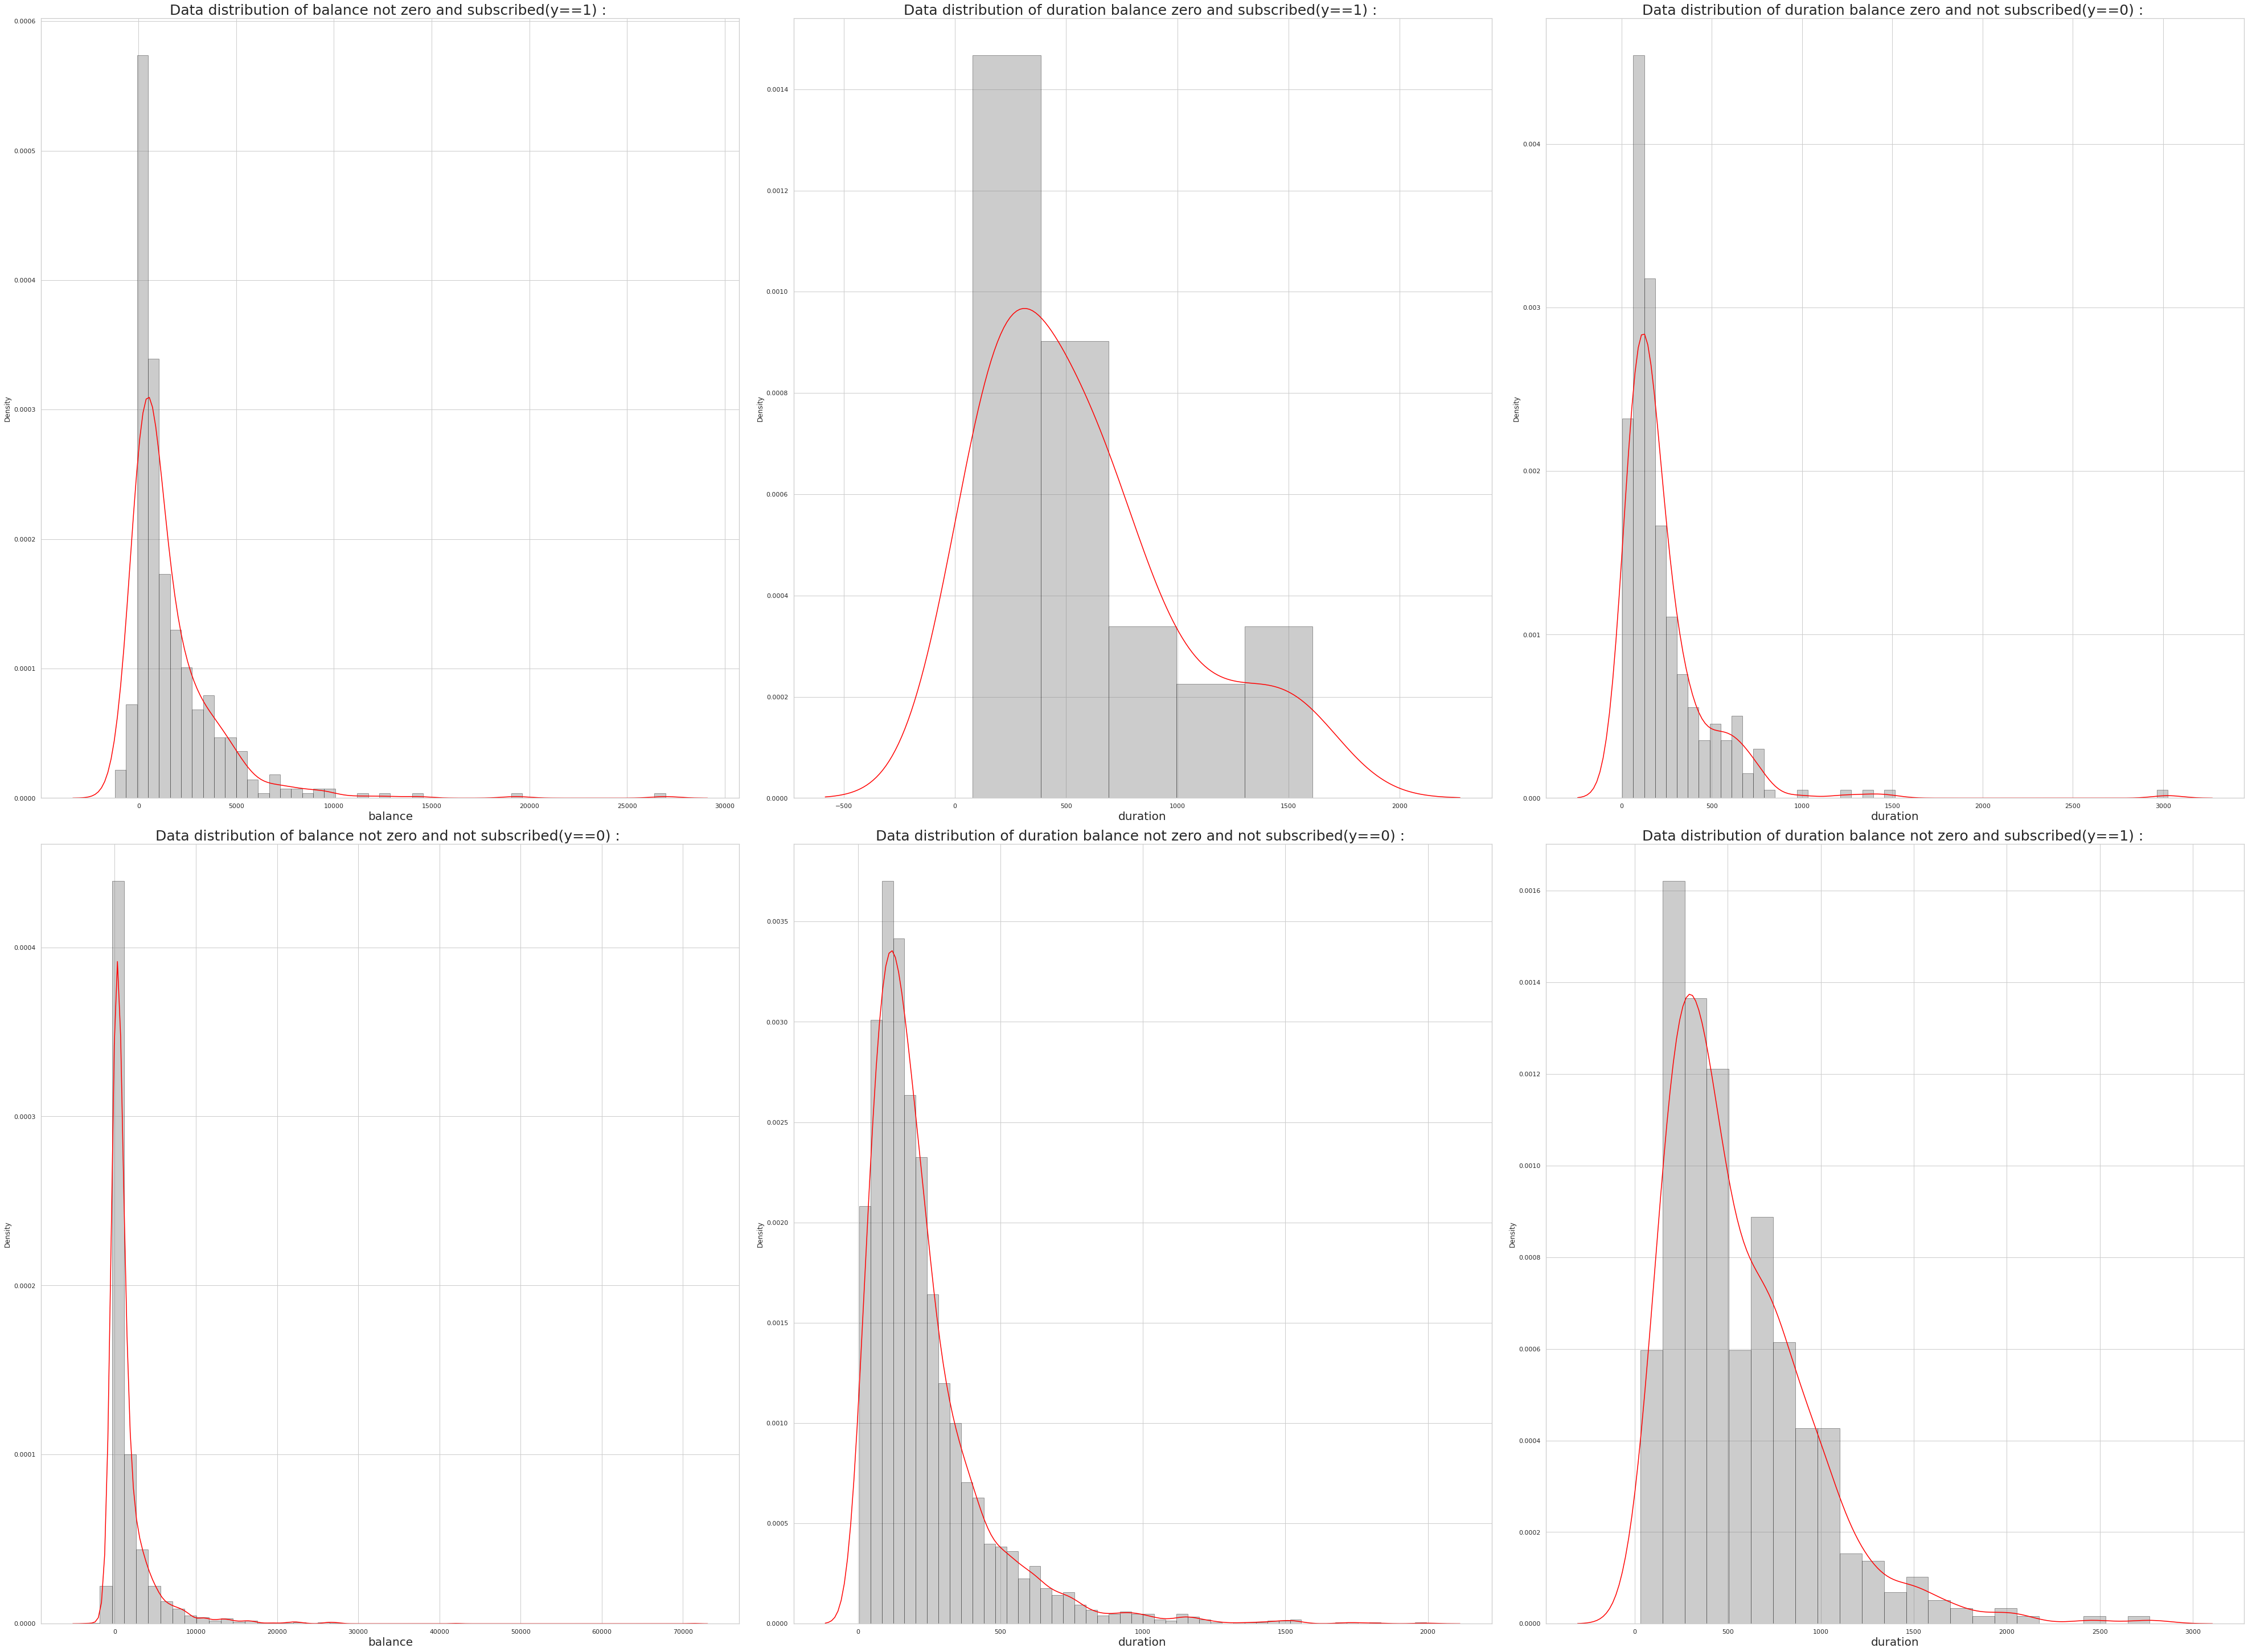

In [ ]:
sb.set_style("whitegrid")
fig = plt.figure(figsize = [55,60])

ax1 = plt.subplot(3,3,1)
a1 = data[data['balance']!=0]
sb.distplot(a1[a1['y']==1]['balance'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Data distribution of balance not zero and subscribed(y==1) : "
ax1.set_title(plot_name,fontsize = 25)
plt.xlabel("balance",fontsize=20)


ax2 = plt.subplot(3,3,2)
a1 = data[data['balance']==0]
sb.distplot(a1[a1['y']==1]['duration'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Data distribution of duration balance zero and subscribed(y==1) : "
ax2.set_title(plot_name,fontsize = 25)
plt.xlabel("duration",fontsize=20)


ax3 = plt.subplot(3,3,6)
a1 = data[data['balance']!=0]
sb.distplot(a1[a1['y']==1]['duration'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Data distribution of duration balance not zero and subscribed(y==1) : "
ax3.set_title(plot_name,fontsize = 25)
plt.xlabel("duration",fontsize=20)


ax4 = plt.subplot(3,3,4)
a1 = data[data['balance']!=0]
sb.distplot(a1[a1['y']==0]['balance'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Data distribution of balance not zero and not subscribed(y==0) : "
ax4.set_title(plot_name,fontsize = 25)
plt.xlabel("balance",fontsize=20)


ax5 = plt.subplot(3,3,5)
a1 = data[data['balance']!=0]
sb.distplot(a1[a1['y']==0]['duration'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Data distribution of duration balance not zero and not subscribed(y==0) : "
ax5.set_title(plot_name,fontsize = 25)
plt.xlabel("duration",fontsize=20)


ax6 = plt.subplot(3,3,3)
a1 = data[data['balance']==0]
sb.distplot(a1[a1['y']==0]['duration'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Data distribution of duration balance zero and not subscribed(y==0) : "
ax6.set_title(plot_name,fontsize = 25)
plt.xlabel("duration",fontsize=20)


plt.tight_layout()
plt.show() 



**Replacing zero values of balance of both classes with mean of both classes where balance was not zero ** 

In [ ]:
a1= data[data['balance']==0]
a2 = data[data['balance']!=0]
a2_y1 = a2[a2['y']==1]['duration/balance'].mean()
a2_y0 = a2[a2['y']==0]['duration/balance'].mean()

data['duration/balance'] = np.where((data['balance']==0) & (data['y']==1) , a2_y1, data['duration/balance'])
data['duration/balance'] = np.where((data['balance']==0) & (data['y']==0) , a2_y0, data['duration/balance'])

for col in ['duration/age','duration/balance','duration/campaign']:
    data[col]=data[col].apply(lambda x : round(x))


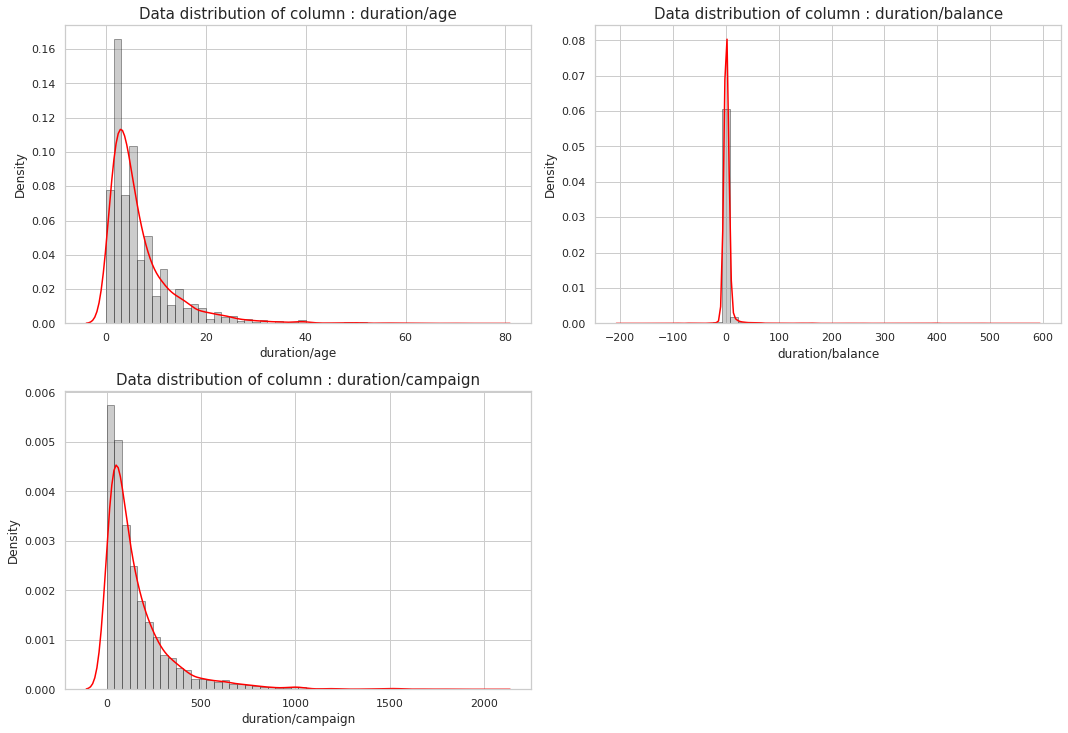

In [ ]:
sb.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['duration/age','duration/balance','duration/campaign']
cnt = 1
for col in cols :
    ax = plt.subplot(4,2,cnt)
    sb.distplot(pd.to_numeric(data[col]), hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
    cnt+=1
    plot_name = "Data distribution of column : "+col
    ax.set_title(plot_name,fontsize = 15)
plt.tight_layout()
plt.show() 



Separating numerical and categorical columns

In [ ]:
data_categor = data.select_dtypes(include=object)
df_categor = pd.DataFrame({'types': data_categor.dtypes,
                         'uniques': data_categor.nunique()})
df_categor

Numerical_variables = list(data.select_dtypes(include=[np.float64,np.int64]).columns)
Categorical_variables = list(data.select_dtypes(include=[object]).columns)
Categorical_variables.append(['age_bin'])


Categorical_variables.append('day_bins')
Categorical_variables.pop(-1)

Categorical_variables.append('day_bins')

Correlation would have increased as duration was positively correlated with target variable and duration was negative correlated with balance, campaign and age. Lets see how they contribute to our correlation score.

Our new variables are adding to correlation scores.

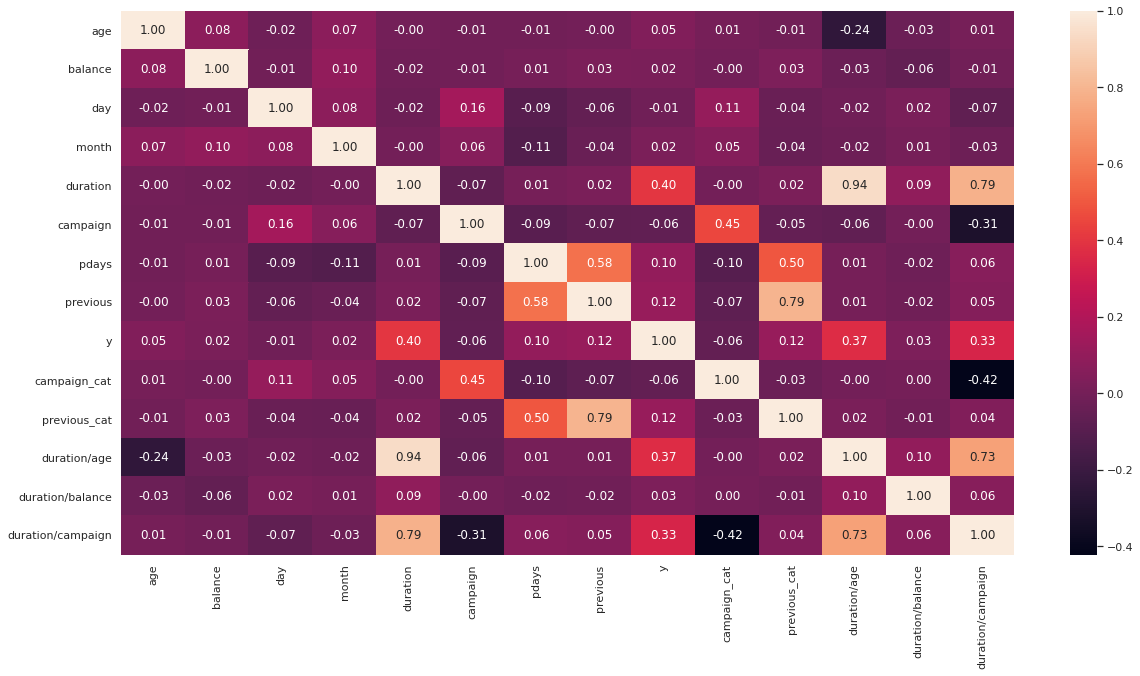

In [ ]:
# Checking Pearson's correlation with a heatmap
# correlation matrix 
plt.figure(figsize = (20,10))        
sb.heatmap(data[Numerical_variables].corr(),annot = True, fmt='.2f')
plt.yticks(rotation=0) 
plt.show()


In [ ]:
#display(Numerical_variables) 
#display(Categorical_variables )
#len(Numerical_variables)+len(Categorical_variables)
#Categorical_variables.pop(['age_bin', 'day_bins'])

Top variables contributing to our correltion scores

In [ ]:
Numerical_variables.pop(8)
data_1 = data

sc = StandardScaler()
data_1[Numerical_variables] = sc.fit_transform(data[Numerical_variables])

df = pd.get_dummies(data_1[['job','marital','education','default','housing','loan','contact','poutcome','balance_status','Quarter','day_cat','age_bin','day_bins']],drop_first=True)

data_1 = pd.concat([data_1,df],axis=1)

Categorical_variables=['job','marital','education','default','housing','loan','contact','poutcome','balance_status','Quarter','day_cat','age_bin','day_bins']
data_1.drop(Categorical_variables,1,inplace=True)

cor_deposit=data_1.corr()
cor_deposit["y"].sort_values(ascending=False).head(30)


y                     1.000000
duration              0.401118
duration/age          0.372241
duration/campaign     0.334850
poutcome_success      0.283481
age_bin_Elder         0.139875
previous              0.116714
previous_cat          0.116478
pdays                 0.104087
job_retired           0.086675
Quarter_Q4            0.063894
education_tertiary    0.056649
day_cat_3             0.052566
poutcome_other        0.051908
job_student           0.047809
marital_single        0.045815
age                   0.045092
day_bins_w2           0.040602
job_management        0.032634
duration/balance      0.029879
balance_status_low    0.028900
contact_telephone     0.025878
month                 0.023335
job_unknown           0.019886
balance               0.017905
day_cat_5             0.004963
job_housemaid         0.004872
default_yes           0.001303
job_self-employed    -0.003827
day_bins_w4          -0.003870
Name: y, dtype: float64

In [ ]:
data_1

,age,balance,day,month,duration,campaign,pdays,previous,y,campaign_cat,previous_cat,duration/age,duration/balance,duration/campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,balance_status_low,balance_status_negative,Quarter_Q2,Quarter_Q3,Quarter_Q4,day_cat_2,day_cat_3,day_cat_4,day_cat_5,age_bin_midAge,age_bin_Adult,age_bin_old,age_bin_Elder,day_bins_w2,day_bins_w3,day_bins_w4
0,-1.056270,0.121072,0.374052,1.611873,-0.711861,-0.576829,-0.407218,-0.320413,0,-1.26778,-0.283804,-0.542659,-0.122945,-0.428075,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,-0.772583,1.118644,-0.596026,-0.490631,-0.169194,-0.576829,2.989044,2.041734,0,-1.26778,3.523554,0.022632,-0.122945,0.303380,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
2,-0.583458,-0.024144,0.010273,-0.911131,-0.303898,-0.576829,2.899143,0.270124,0,-1.26778,-0.283804,-0.260014,-0.122945,0.121813,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,-1.056270,0.017726,-1.566105,-0.070130,-0.250017,0.387967,-0.407218,-0.320413,0,0.78878,-0.283804,0.022632,-0.122945,-0.578516,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.686036,-0.472753,-1.323585,-0.490631,-0.146102,-0.576829,-0.407218,-0.320413,0,-1.26778,-0.283804,-0.401336,0.007085,0.334506,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,-0.583410,1.707910,0.350371,0.250315,0.709566,-0.407218,-0.320413,0,0.78878,-0.283804,0.446599,-0.166288,-0.495514,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4517,1.496912,-1.573671,-0.838546,-0.490631,-0.427057,-0.576829,-0.407218,-0.320413,0,-1.26778,-0.283804,-0.542659,-0.122945,-0.044191,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0
4518,1.496912,-0.374724,0.374052,0.770871,-0.434754,2.639160,-0.407218,-0.320413,0,0.78878,-0.283804,-0.542659,-0.079601,-0.765270,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4519,-1.245394,-0.094925,-1.202326,-1.752133,-0.519426,0.387967,1.710451,1.451197,0,0.78878,3.523554,-0.260014,-0.122945,-0.671893,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
dep = data['y']
data.drop(labels=['y'], axis=1,inplace=True)
data.insert(0, 'y', dep)
data.head()
# housing has a -20% correlation with deposit let's see how it is distributed.
# 52 %
data["housing"].value_counts()/len(data_copy)

yes    0.566025
no     0.433975
Name: housing, dtype: float64

**Stratified Sampling:**

**Failure of k-Fold Cross-Validation**
**Sadly, the k-fold cross-validation is not appropriate for evaluating imbalanced classifiers.**

**This might work fine for data with a balanced class distribution, but when the distribution is severely skewed, it is likely that one or more folds will have few or no examples from the minority class. This means that some or perhaps many of the model evaluations will be misleading, as the model need only predict the majority class correctly.**

Personal Loans:<br>
For instance, having a personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit. What steps we should take before implementing stratified sampling in our train and test data?<br>
1) We need to see how our data is distributed. <br>
2) After noticiing that the column of loan contains 87% of "no" (Does not have personal loans) and 13% of "yes" (Have personal loans.) <br> 
3) We want to make sure that our training and test set contains the same ratio of 87% "no" and 13% "yes"." Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. What do I mean by this? <br><br>


Personal Loans:<br>
For instance, having a personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit. What steps we should take before implementing stratified sampling in our train and test data?

In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(data, data["loan"]):
    stratified_train = data.loc[train_set]
    stratified_test = data.loc[test_set]
    
display(stratified_train["y"].value_counts()/len(data))
display(stratified_test["y"].value_counts()/len(data))

0    0.706260
1    0.093563
Name: y, dtype: float64

0    0.178500
1    0.021677
Name: y, dtype: float64

Scaling and using dummies for categorical variables

In [ ]:
Numerical_variables.pop(8)

sc = StandardScaler()
stratified_train[Numerical_variables] = sc.fit_transform(stratified_train[Numerical_variables])
stratified_test[Numerical_variables] = sc.fit_transform(stratified_test[Numerical_variables])


df_train = pd.get_dummies(stratified_train[['job','marital','education','default','housing','loan','contact','poutcome','balance_status','Quarter','day_cat','age_bin','day_bins']],drop_first=True)
df_test = pd.get_dummies(stratified_test[['job','marital','education','default','housing','loan','contact','poutcome','balance_status','Quarter','day_cat','age_bin','day_bins']],drop_first=True)

stratified_train = pd.concat([stratified_train,df_train],axis=1)
stratified_test = pd.concat([stratified_test,df_test],axis=1)

Categorical_variables=['job','marital','education','default','housing','loan','contact','poutcome','balance_status','Quarter','day_cat','age_bin','day_bins']

stratified_train.drop(Categorical_variables,1,inplace=True)
stratified_test.drop(Categorical_variables,1,inplace=True)

display(stratified_train.head())
display(stratified_test.head())

,y,age,balance,day,month,duration,campaign,pdays,previous,campaign_cat,previous_cat,duration/age,duration/balance,duration/campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,balance_status_low,balance_status_negative,Quarter_Q2,Quarter_Q3,Quarter_Q4,day_cat_2,day_cat_3,day_cat_4,day_cat_5,age_bin_midAge,age_bin_Adult,age_bin_old,age_bin_Elder,day_bins_w2,day_bins_w3,day_bins_w4
1780,0,1.595628,0.034111,-0.095825,-0.489250,-0.488380,-0.254046,-0.408208,-0.321663,0.78878,-0.289151,-0.685179,-0.132908,-0.483884,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2964,0,-0.014352,-0.475690,0.875110,0.343869,-0.726585,0.700542,-0.408208,-0.321663,0.78878,-0.289151,-0.685179,0.710573,-0.748514,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1556,0,1.311514,-0.400670,-0.824026,-0.072691,-0.344701,0.064150,-0.408208,-0.321663,0.78878,-0.289151,-0.544805,-0.086048,-0.533814,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
3255,0,1.311514,-0.382332,-0.217192,0.343869,-0.053562,0.382346,-0.408208,-0.321663,0.78878,-0.289151,-0.264056,-0.086048,-0.508849,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
3013,1,0.743286,-0.302644,-1.552227,-1.322369,-0.431665,-0.254046,-0.408208,-0.321663,0.78878,-0.289151,-0.544805,-0.132908,-0.443940,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


,y,age,balance,day,month,duration,campaign,pdays,previous,campaign_cat,previous_cat,duration/age,duration/balance,duration/campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,balance_status_low,balance_status_negative,Quarter_Q2,Quarter_Q3,Quarter_Q4,day_cat_2,day_cat_3,day_cat_4,day_cat_5,age_bin_midAge,age_bin_Adult,age_bin_old,age_bin_Elder,day_bins_w2,day_bins_w3,day_bins_w4
1540,0,-0.962978,-0.059215,-0.050587,0.378034,0.394953,-0.596939,-0.403277,-0.315684,-1.26778,-0.261681,0.628681,-0.097930,1.274504,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
4337,1,2.985116,-0.285839,-0.050587,1.690517,0.744736,-0.596939,0.185492,0.305390,-1.26778,-0.261681,-0.098141,-0.063418,1.804389,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
657,0,2.139096,-0.441951,-0.656158,-1.371944,-0.575279,-0.596939,0.530632,0.305390,-1.26778,-0.261681,-0.679598,0.005606,-0.195295,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
2837,1,0.165049,-0.226806,0.433870,2.128012,4.175942,-0.260557,0.845319,0.926463,0.78878,-0.261681,3.245239,-0.028906,3.034478,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3825,0,-0.868975,-0.454742,1.039442,0.815528,-0.512817,1.757737,-0.403277,-0.315684,0.78878,-0.261681,-0.388870,1.040966,-0.832418,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1


Splitting train and test set

In [ ]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['y'].value_counts()


y_train = train_data['y']
y_test = test_data['y']

train_data.drop(labels=['y'], axis=1,inplace=True)
test_data.drop(labels=['y'], axis=1,inplace=True)

X_train = train_data
X_test = test_data

Data has class imbalance, biased towards the negative class. Hence higher chance of getting more number of negative classes(TN+FN). Ensembles such as bagging perform better on class imbalance. 

In [ ]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),

}

## Training Classifiers on hold out set
As visible our data overfitted on hold out split


In [ ]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [ ]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.23 s
trained Nearest Neighbors in 0.06 s
trained Linear SVM in 0.48 s
trained Gradient Boosting Classifier in 1.01 s
trained Decision Tree in 0.04 s
trained Random Forest in 0.10 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.041975
5                 Random Forest     0.996405       0.098929
3  Gradient Boosting Classifier     0.943584       1.008475
2                    Linear SVM     0.923949       0.477725
1             Nearest Neighbors     0.915100       0.064109
0           Logistic Regression     0.902378       0.233041


## Will create cross validation split of sratified sampled train and test set to avoid overfitting

In [ ]:

# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18,class_weight='balanced')
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

cb_clf = CatBoostClassifier()
cb_scores = cross_val_score(cb_clf, X_train, y_train, cv=3)
cb_mean = cb_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC','Catboost Clf'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean,cb_mean]}

result_df = pd.DataFrame(data=d)

Learning rate set to 0.014999
0:	learn: 0.6764922	total: 54.2ms	remaining: 54.1s
1:	learn: 0.6612258	total: 58.7ms	remaining: 29.3s
2:	learn: 0.6438231	total: 62.6ms	remaining: 20.8s
3:	learn: 0.6279746	total: 66.4ms	remaining: 16.5s
4:	learn: 0.6160747	total: 70.5ms	remaining: 14s
5:	learn: 0.6008691	total: 74.3ms	remaining: 12.3s
6:	learn: 0.5884322	total: 78.2ms	remaining: 11.1s
7:	learn: 0.5760098	total: 82.1ms	remaining: 10.2s
8:	learn: 0.5646472	total: 85.9ms	remaining: 9.46s
9:	learn: 0.5536371	total: 89.6ms	remaining: 8.87s
10:	learn: 0.5419071	total: 93.4ms	remaining: 8.4s
11:	learn: 0.5318151	total: 97.2ms	remaining: 8s
12:	learn: 0.5209908	total: 101ms	remaining: 7.67s
13:	learn: 0.5121596	total: 105ms	remaining: 7.38s
14:	learn: 0.5030540	total: 109ms	remaining: 7.13s
15:	learn: 0.4929000	total: 112ms	remaining: 6.91s
16:	learn: 0.4838141	total: 116ms	remaining: 6.71s
17:	learn: 0.4749779	total: 120ms	remaining: 6.54s
18:	learn: 0.4675875	total: 124ms	remaining: 6.41s
19:	l

In [ ]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
6,Catboost Clf,0.902654
4,Grad B CLF,0.900720
0,Logistic Reg.,0.897401
5,Rand FC,0.891592
1,SVC,0.889379
2,KNN,0.886341
3,Dec Tree,0.861729


In [ ]:
classifier = [cb_clf,grad_clf,log_reg,rand_clf]
cls_name=['Catboost','Gradient boosting','Logistic Regression','Randomforest']

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred ={}

y_train_pred[0] = cross_val_predict(cb_clf, X_train, y_train, cv=3)
cb_clf.fit(X_train, y_train)


Learning rate set to 0.014999
0:	learn: 0.6764922	total: 4.37ms	remaining: 4.37s
1:	learn: 0.6612258	total: 11.8ms	remaining: 5.88s
2:	learn: 0.6438231	total: 18.1ms	remaining: 6.02s
3:	learn: 0.6279746	total: 26ms	remaining: 6.47s
4:	learn: 0.6160747	total: 30.3ms	remaining: 6.02s
5:	learn: 0.6008691	total: 34.5ms	remaining: 5.72s
6:	learn: 0.5884322	total: 39.1ms	remaining: 5.54s
7:	learn: 0.5760098	total: 46.1ms	remaining: 5.71s
8:	learn: 0.5646472	total: 59ms	remaining: 6.5s
9:	learn: 0.5536371	total: 63.7ms	remaining: 6.3s
10:	learn: 0.5419071	total: 68.2ms	remaining: 6.13s
11:	learn: 0.5318151	total: 72.2ms	remaining: 5.95s
12:	learn: 0.5209908	total: 76.6ms	remaining: 5.81s
13:	learn: 0.5121596	total: 80.5ms	remaining: 5.67s
14:	learn: 0.5030540	total: 84.5ms	remaining: 5.54s
15:	learn: 0.4929000	total: 88.4ms	remaining: 5.43s
16:	learn: 0.4838141	total: 92.1ms	remaining: 5.33s
17:	learn: 0.4749779	total: 96.1ms	remaining: 5.24s
18:	learn: 0.4675875	total: 101ms	remaining: 5.19s

Catboost Classifier accuracy is 0.90
------------------------------------------------------------------------------------------
Cross validating Gradient boosting
Gradient boosting Classifier accuracy is 0.90
------------------------------------------------------------------------------------------
Cross validating Logistic Regression
Logistic Regression Classifier accuracy is 0.90
------------------------------------------------------------------------------------------
Cross validating Randomforest
Randomforest Classifier accuracy is 0.89
------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
Classification report for Catboost
Precision Score:  0.6497890295358649
Recall Score:  0.3640661938534279
CatboostClassifier
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3193
           1       0.65      0.36   

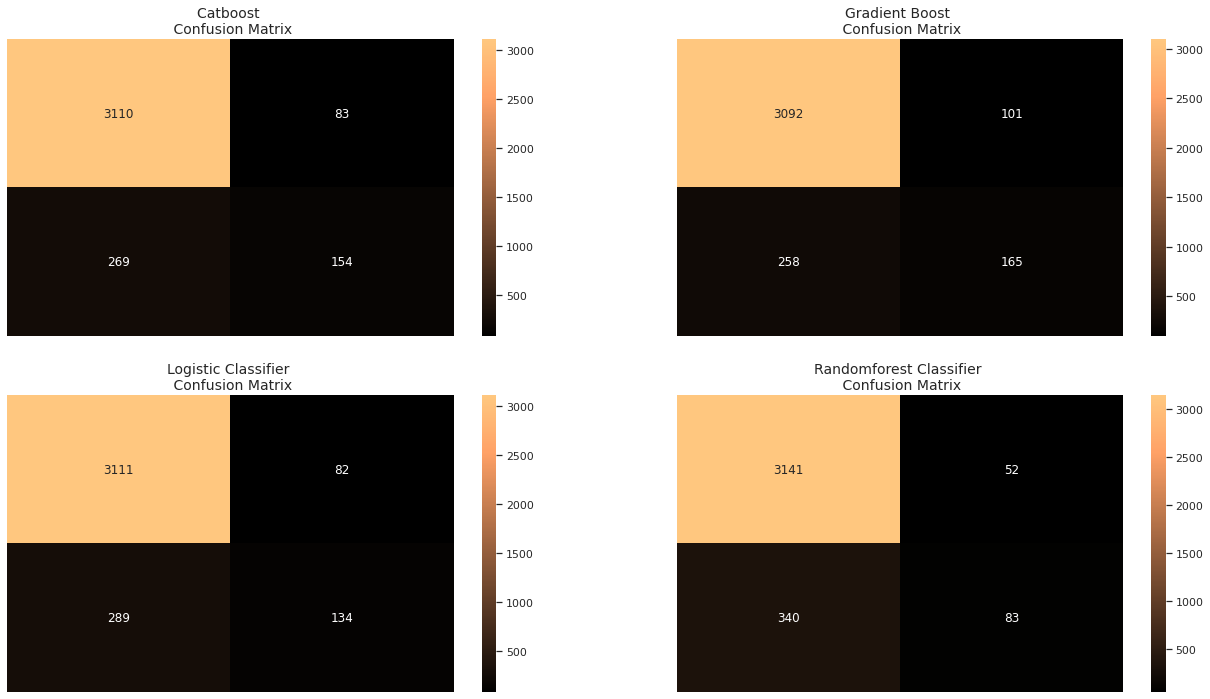

In [ ]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
    

print(cls_name[0]+" Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred[0]))
for i,cl in enumerate(classifier[1:]):
    print('--'*45)
    print("Cross validating "+cls_name[i+1])   
    y_train_pred[i+1] = cross_val_predict(cl, X_train, y_train, cv=3)
    cl.fit(X_train, y_train)
    print(cls_name[i+1]+" Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred[i+1]))


cat_cf = confusion_matrix(y_train, y_train_pred[0])
grd_boost_cf = confusion_matrix(y_train, y_train_pred[1])
log_cf = confusion_matrix(y_train, y_train_pred[2])
rand_cf = confusion_matrix(y_train, y_train_pred[3])
    



fig, ax = plt.subplots(2, 2,figsize=(22,12))


sb.heatmap(cat_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper,fmt='g')
ax[0, 0].set_title("Catboost \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sb.heatmap(grd_boost_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper,fmt='g')
ax[0][1].set_title("Gradient Boost \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sb.heatmap(log_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper,fmt='g')
ax[1][0].set_title("Logistic Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sb.heatmap(rand_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper,fmt='g')
ax[1][1].set_title("Randomforest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


print('--'*45)
print()

for i,cl in enumerate(classifier):
    print('--'*45)
    print("Classification report for "+cls_name[i])   
    # Let's find the scores  for precision and recall.
    # The model is 77% sure that the potential client will suscribe to a term deposit. 
    # The model is only retaining 60% of clients that agree to suscribe a term deposit.
    print('Precision Score: ', precision_score(y_train, y_train_pred[i]))
    # The classifier only detects 60% of potential clients that will suscribe to a term deposit.
    print('Recall Score: ', recall_score(y_train, y_train_pred[i]))

    print(cls_name[i]+'Classifier')
    print(classification_report(y_train, y_train_pred[i]))

plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred[0])

0.46666666666666673

Plotting Roc-auc curves 

In [ ]:
some_instance = X_train.iloc[1250,:].values
y_scores = cb_clf.predict_proba([some_instance])
# Increasing the threshold decreases the recall.
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
logistic_y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3, method="predict_proba")
rand_y_scores = cross_val_predict(rand_clf, X_train, y_train, cv=3, method="predict_proba")
cat_scores = cross_val_predict(cb_clf, X_train, y_train, cv=3, method="predict_proba")

# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if logistic_y_scores.ndim == 2:
    logistic_y_scores = logistic_y_scores[:, 1]
    
if rand_y_scores.ndim == 2:
    rand_y_scores = rand_y_scores[:, 1]

if cat_scores.ndim == 2:
    cat_scores = cat_scores[:, 1]

Learning rate set to 0.014999
0:	learn: 0.6764922	total: 4.21ms	remaining: 4.21s
1:	learn: 0.6612258	total: 8.02ms	remaining: 4s
2:	learn: 0.6438231	total: 11.8ms	remaining: 3.92s
3:	learn: 0.6279746	total: 16ms	remaining: 3.97s
4:	learn: 0.6160747	total: 20ms	remaining: 3.97s
5:	learn: 0.6008691	total: 23.9ms	remaining: 3.96s
6:	learn: 0.5884322	total: 27.6ms	remaining: 3.92s
7:	learn: 0.5760098	total: 31.5ms	remaining: 3.9s
8:	learn: 0.5646472	total: 35.2ms	remaining: 3.87s
9:	learn: 0.5536371	total: 39ms	remaining: 3.86s
10:	learn: 0.5419071	total: 43.1ms	remaining: 3.88s
11:	learn: 0.5318151	total: 47ms	remaining: 3.87s
12:	learn: 0.5209908	total: 50.8ms	remaining: 3.86s
13:	learn: 0.5121596	total: 54.7ms	remaining: 3.85s
14:	learn: 0.5030540	total: 58.4ms	remaining: 3.84s
15:	learn: 0.4929000	total: 62.2ms	remaining: 3.83s
16:	learn: 0.4838141	total: 65.9ms	remaining: 3.81s
17:	learn: 0.4749779	total: 69.7ms	remaining: 3.8s
18:	learn: 0.4675875	total: 73.5ms	remaining: 3.79s
19:	l

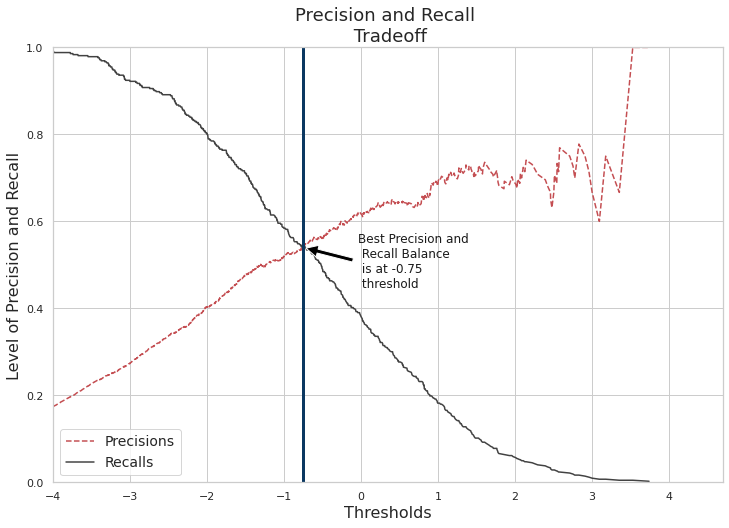

Gradient Boost Classifier AUC Score:  0.9015043990289041
Logistic AUC Score:  0.869312229248526
Random Forest AUC Score:  0.8788092154898534
Catboost AUC Score:  0.9151372054264686


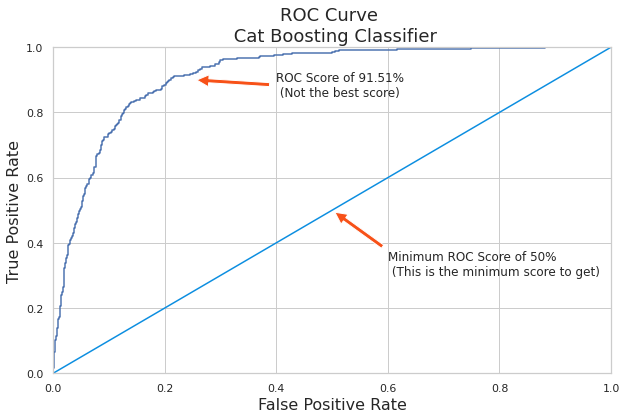

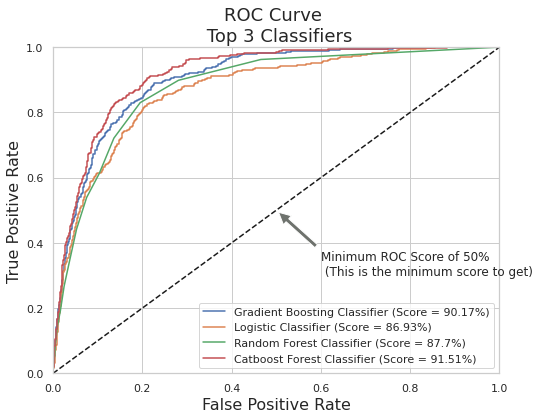

In [ ]:


# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)


def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-4, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=-0.75, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at -0.75 \n threshold ', xy=(-0.75, 0.54), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()


from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
# Neural Classifier
# Naives Bayes Classifier
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, logistic_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, rand_y_scores)
cat_fpr, cat_tpr, cat_threshold = roc_curve(y_train, cat_scores)


from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier AUC Score: ', roc_auc_score(y_train, y_scores))
print('Logistic AUC Score: ', roc_auc_score(y_train, logistic_y_scores))
print('Random Forest AUC Score: ', roc_auc_score(y_train, rand_y_scores))
print('Catboost AUC Score: ', roc_auc_score(y_train, cat_scores))


def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Cat Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.51% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(cat_fpr, cat_tpr, threshold)
plt.show()


def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr,cat_fpr, cat_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 90.17%)')
    plt.plot(neu_fpr, neu_tpr, label='Logistic Classifier (Score = 86.93%) ')
    plt.plot(nav_fpr, nav_tpr, label='Random Forest Classifier (Score = 87.7%)')
    plt.plot(cat_fpr, cat_tpr, label='Catboost Forest Classifier (Score = 91.51%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr,cat_fpr, cat_tpr)
plt.show()

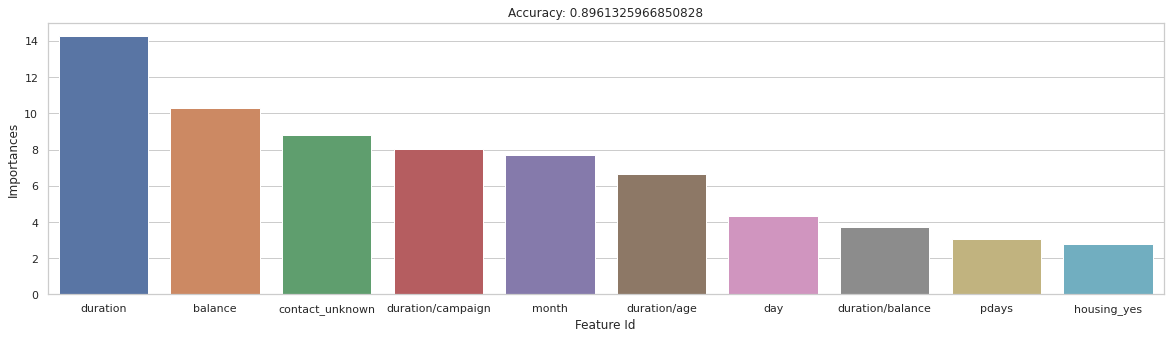

In [ ]:
plt.figure(figsize=(20,5))
fi=cb_clf.get_feature_importance(prettified=True).head(10)
sb.barplot(x="Feature Id",y="Importances",data=fi)
score=cb_clf.score(X_test,y_test)
plt.title('Accuracy: '+str(score))
plt.show()

## **Fixing class imbalance**

In [ ]:


# The classes are heavily skewed we need to solve this issue later.
print('Number of client who said no to term depsits', round(data_copy['y'].value_counts()[0]/len(data_copy) * 100,2), '% of the dataset')
print('Number of client who said yes to term depsits', round(data_copy['y'].value_counts()[1]/len(data_copy) * 100,2), '% of the dataset')



Number of client who said no to term depsits 88.48 % of the dataset
Number of client who said yes to term depsits 11.52 % of the dataset




**Note: Notice how imbalanced is our original dataset! Most of the transactions are non term deposit. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are non term deposit. But we don't want our model to assume, we want our model to detect patterns that said yes to term deposit!**


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Number of client who said no to term depsits', round(data_copy['y'].value_counts()[0]/len(data_copy) * 100,2), '% of the dataset')
print('Number of client who said yes to term depsits', round(data_copy['y'].value_counts()[1]/len(data_copy) * 100,2), '% of the dataset')

X = data_1.drop('y', axis=1)
y = data_1['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Number of client who said no to term depsits 88.48 % of the dataset
Number of client who said yes to term depsits 11.52 % of the dataset
Train: [ 903  904  906 ... 4518 4519 4520] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 20

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
 
 
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))
 
# List to append the score and then find the average
accuracy_lst = {}
precision_lst = {}
recall_lst = {}
f1_lst = {}
auc_lst = {}
 
# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression(class_weight='balanced')
 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
 
 
 
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
 
 
 
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
 
random_knears = RandomizedSearchCV(KNeighborsClassifier(), knears_params)
 
"""
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
"""
 
 
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
random_svc = RandomizedSearchCV(SVC(), svc_params)
 
 
"""
grid_svc.fit(X_train, y_train)
 
# SVC best estimator
svc = grid_svc.best_estimator_
"""
 
 
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
random_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params)
 
"""
grid_tree.fit(X_train, y_train)
 
# tree best estimator
tree_clf = grid_tree.best_estimator_
"""
 
 
# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
 
 
# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18,class_weight='balanced')
 
cb_clf = CatBoostClassifier()
 
 
# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
 
cls_name = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier']
classifiers = [rand_log_reg,random_knears,random_svc,random_tree,grad_clf,rand_clf]
 
for i,cl in enumerate(classifiers):
 
    for train, test in sss.split(original_Xtrain, original_ytrain):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), cl) # SMOTE happens during Cross Validation not before..
        model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
        if cl in [grad_clf,rand_clf,cb_clf]:
            prediction = cl.predict(original_Xtrain[test])
        else:
            best_est = cl.best_estimator_
            prediction = best_est.predict(original_Xtrain[test])
            if prediction.ndim == 2:
              prediction = prediction[:, 1]
        accuracy_lst[cl]=pipeline.score(original_Xtrain[test], original_ytrain[test])
        precision_lst[cl]=precision_score(original_ytrain[test], prediction)
        recall_lst[cl]=recall_score(original_ytrain[test], prediction)
        f1_lst[cl]=f1_score(original_ytrain[test], prediction)
        auc_lst[cl]=roc_auc_score(original_ytrain[test], prediction)
        
    print('---' * 45)
    print('Metric Report  for',cls_name[i])
    print()
    print("accuracy: {}".format(np.mean(accuracy_lst[cl])))
    print("precision: {}".format(np.mean(precision_lst[cl])))
    print("recall: {}".format(np.mean(recall_lst[cl])))
    print("f1: {}".format(np.mean(f1_lst[cl])))
    print('---' * 45)

Length of X (train): 3617 | Length of y (train): 3617
Length of X (test): 904 | Length of y (test): 904
---------------------------------------------------------------------------------------------------------------------------------------
Metric Report  for LogisticRegression

accuracy: 0.8464730290456431
precision: 0.40789473684210525
recall: 0.7469879518072289
f1: 0.527659574468085
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
Metric Report  for KNeighborsClassifier

accuracy: 0.8686030428769018
precision: 0.43023255813953487
recall: 0.4457831325301205
f1: 0.43786982248520706
---------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------

Checking results on test set for 4 classifiers (logistic, KNN, SVC, Decision Tree)

---------------------------------------------------------------------------------------------------------------------------------------
Metric Report  for LogisticRegressionon Test data

              precision    recall  f1-score   support

          no       0.92      0.96      0.94       800
         yes       0.55      0.39      0.46       104

    accuracy                           0.89       904
   macro avg       0.74      0.68      0.70       904
weighted avg       0.88      0.89      0.88       904


---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------

Average precision-recall score for LogisticRegression
Average precision-recall score: 0.49

------------------------------------------------------------------------------------------------------------------------

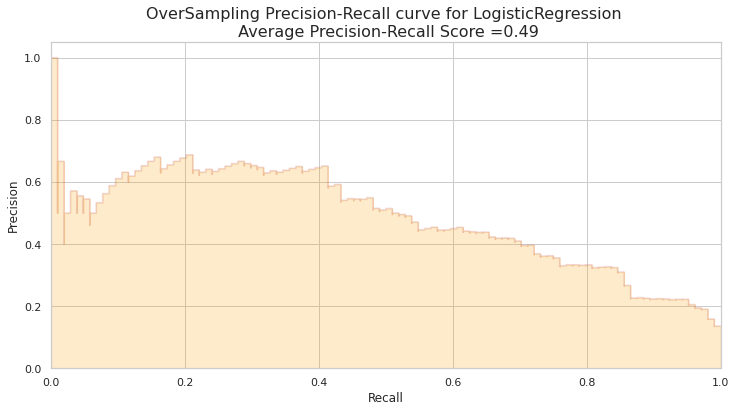

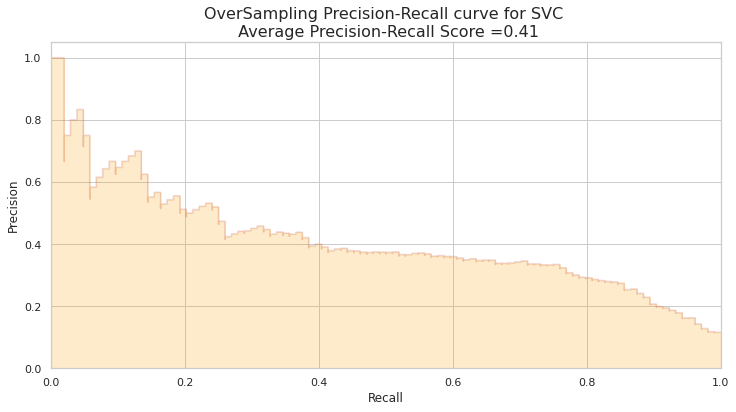

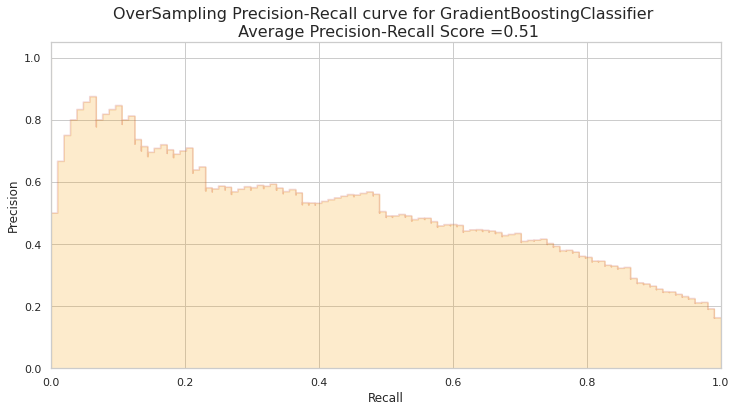

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

labels = ['no', 'yes']
classifiers_ = [rand_log_reg,random_svc,grad_clf]
cls_name_ = ['LogisticRegression','SVC','GradientBoostingClassifier']


for i,c1 in enumerate(classifiers_):
    original_ytest= np.where(original_ytest==0, 'no', original_ytest) 
    original_ytest= np.where(original_ytest=='1', 'yes', original_ytest) 
 
    print('---' * 45)
    print('Metric Report  for',cls_name_[i]+"on Test data")
    print()
    
    if (cl in [rand_log_reg,random_svc]):
      smote_prediction = c1.best_estimator_.predict(original_Xtest)
    else:
      smote_prediction = cl.predict(original_Xtest)

    smote_prediction= np.where(smote_prediction==0, 'no', smote_prediction) 
    smote_prediction= np.where(smote_prediction=='1', 'yes', smote_prediction)
    print(classification_report(original_ytest, smote_prediction, target_names=labels))
    print()
    print('---' * 45)
    print('---' * 45)
    print()
    original_ytest= np.where(original_ytest=='no', 0, original_ytest) 
    original_ytest= np.where(original_ytest=='yes', 1, original_ytest) 

    if (cl in [rand_log_reg,random_svc]):
      y_score = c1.best_estimator_.decision_function(original_Xtest)    
    else:
      y_score = c1.decision_function(original_Xtest)

                
          
    print('Average precision-recall score for '+cls_name_[i])
    original_ytest= original_ytest.astype(int)
    average_precision = average_precision_score(original_ytest, y_score)
          
    print('Average precision-recall score: {0:0.2f}'.format(
                average_precision))
    print()
          

    print('---' * 45)
    print()
    print('OverSampling Precision-Recall curve: '+cls_name_[i]+" on Test data")
    fig = plt.figure(figsize=(12,6))

    precision, recall, _ = precision_recall_curve(original_ytest, y_score)

    plt.step(recall, precision, color='r', alpha=0.2,
              where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                      color='#F59B00')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('OverSampling Precision-Recall curve for '+cls_name_[i]+' \n Average Precision-Recall Score ={0:0.2f}'.format(
                    average_precision), fontsize=16)

# SMOTE Technique (OverSampling) After splitting and Cross Validating


In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)

# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

Before Smote

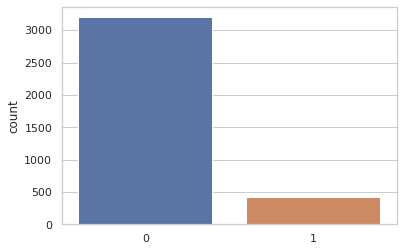

In [ ]:
sb.countplot(original_ytrain)

After Smote

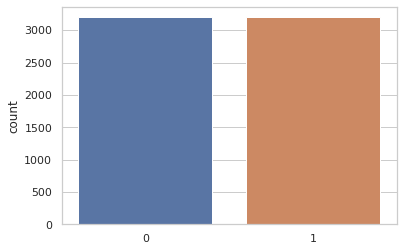

In [ ]:
sb.countplot(ysm_train)

In [ ]:
import time

# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

cls_name = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','GradientBoostingClassifier']
classifiers = [rand_log_reg,random_knears,random_svc,random_tree,grad_clf]
a={}
for i,cl in enumerate(classifiers):
  print('---' * 45)
  print(cls_name[i])
  t0 = time.time()
  if un(cl in [rand_log_reg,random_knears,random_svc,random_tree]):
        a[i]=cl.best_estimator_
        a[i].fit(Xsm_train, ysm_train)
  else:
          a[i]=cl.fit(Xsm_train, ysm_train)
  t1 = time.time()
  #print(log_reg[i])
  print("Fitting oversample data took :{} sec".format(t1 - t0)+str()+" for "+cls_name[i])


---------------------------------------------------------------------------------------------------------------------------------------
LogisticRegression
Fitting oversample data took :0.1757490634918213 sec for LogisticRegression
---------------------------------------------------------------------------------------------------------------------------------------
KNeighborsClassifier
Fitting oversample data took :0.03780198097229004 sec for KNeighborsClassifier
---------------------------------------------------------------------------------------------------------------------------------------
SVC
Fitting oversample data took :1.7425172328948975 sec for SVC
---------------------------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier
Fitting oversample data took :0.030663251876831055 sec for DecisionTreeClassifier
-------------------------------------------------------------------------------------------

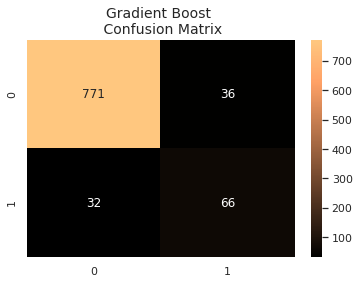

In [ ]:
y_pred_grad = a[4].predict(X_test)
grad_cf = confusion_matrix(y_test, y_pred_grad)
sb.heatmap(grad_cf, annot=True, cmap=plt.cm.copper,fmt='g')
plt.title("Gradient Boost \n Confusion Matrix", fontsize=14)
plt.show()

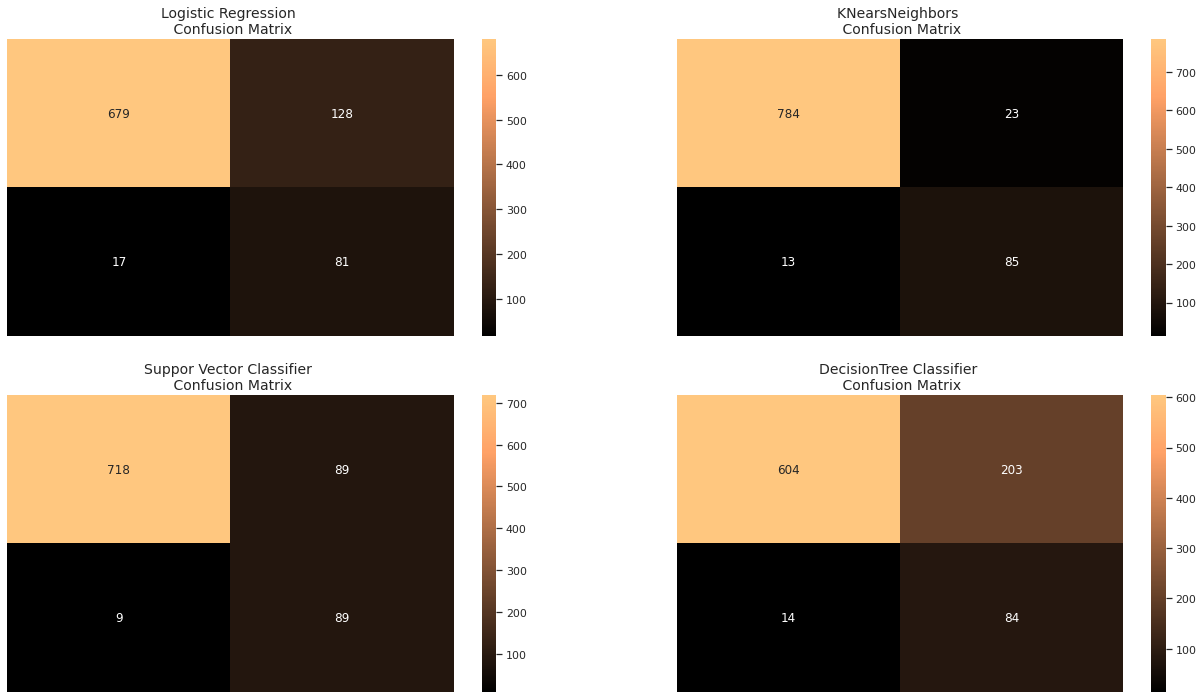

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = a[0].predict(X_test)


# Other models fitted with SMOTE
y_pred_knear = a[1].predict(X_test)
y_pred_svc = a[2].predict(X_test)
y_pred_tree = a[3].predict(X_test)



log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sb.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper,fmt='g')
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sb.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper,fmt='g')
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sb.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper,fmt='g')
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sb.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper,fmt='g')
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [ ]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))
precision, recall, threshold = precision_recall_curve(original_ytest, y_score)
print("Precision score "+str(precision.mean()))
print()
print("Recall score "+str(recall.mean()))
print()
print("Average score"+str(average_precision_score(original_ytest, y_score)))
print()
print()

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))
precision, recall, threshold = precision_recall_curve(y_test, y_pred_knear)
print("Precision score "+str(precision.mean()))
print()
print("Recall score "+str(recall.mean()))
print()
print("Average score"+str(average_precision_score(y_test, y_pred_knear)))
print()
print()

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))
precision, recall, threshold = precision_recall_curve(y_test, y_pred_svc)
print("Precision score "+str(precision.mean()))
print()
print("Recall score "+str(recall.mean()))
print()
print("Average score"+str(average_precision_score(y_test, y_pred_svc)))
print()
print()

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))
precision, recall, threshold = precision_recall_curve(y_test, y_pred_tree)
print("Precision score "+str(precision.mean()))
print()
print("Recall score "+str(recall.mean()))
print()
print("Average score"+str(average_precision_score(y_test, y_pred_tree)))
print()
print()

print('Gradient Boosting Classifier:')
print(classification_report(y_test, y_pred_grad))
precision, recall, threshold = precision_recall_curve(y_test, y_pred_grad)
print("Precision score "+str(precision.mean()))
print()
print("Recall score "+str(recall.mean()))
print()
print("Average score"+str(average_precision_score(y_test, y_pred_grad)))
print()
print()

Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       807
           1       0.39      0.83      0.53        98

    accuracy                           0.84       905
   macro avg       0.68      0.83      0.72       905
weighted avg       0.91      0.84      0.86       905

Precision score 0.3370484761834174

Recall score 0.7749638858793788

Average score0.5092286323615434


KNears Neighbors:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       807
           1       0.79      0.87      0.83        98

    accuracy                           0.96       905
   macro avg       0.89      0.92      0.90       905
weighted avg       0.96      0.96      0.96       905

Precision score 0.6317747766182389

Recall score 0.6224489795918368

Average score0.6969988056609999


Support Vector Classifier:
              precision    recall  f1-score   support

           0       

# Future Improvements:

1). Ensembling of Random forest, gradient boosting, and logistic can give improved results.

2). Recall can be further improved, by using calibrated classifers by changing prediction probability thresholds.

3). We can use classfier with bootstrap class weights.

4). Further different feature can be engineered to further improve true positives.


In [ ]:
val= 'GA Data Science'
if len(val[-1:-3:-1])>1:
    print(val[-1:-3:-1])
else:
    print(val)